# Cleaning transactions 2020

## File version with Time

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import utils
from scipy.stats import zscore
from scipy import stats
import numpy as np

In [21]:
df = pd.read_csv('transactions-2018_utf8.csv', encoding='UTF-8', sep = '\t', parse_dates=[['Date', 'Time']])

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,23,32,33,34,37,38,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df.head()

,Date_Time,Time Zone,Gross Sales,Discounts,Net Sales,Gift Card Sales,Tax,Tip,Partial Refunds,Total Collected,...,Device Nickname,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason,E-money,Discount Name,Transaction Status
0,2018-12-31 14:04:44,Tokyo,¥371,¥0,¥371,¥0,¥29,¥0,¥0,¥400,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
1,2018-12-31 14:03:49,Tokyo,"¥1,075",¥0,"¥1,075",¥0,¥85,¥0,¥0,"¥1,160",...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
2,2018-12-31 13:59:43,Tokyo,¥47,¥0,¥47,¥0,¥3,¥0,¥0,¥50,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
3,2018-12-31 13:50:34,Tokyo,¥862,¥0,¥862,¥0,¥68,¥0,¥0,¥930,...,Nawate Cafe 1,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete
4,2018-12-31 13:50:24,Tokyo,¥240,¥0,¥240,¥0,¥10,¥0,¥0,¥250,...,Nawate Cafe 3,NaN,NaN,NaN,NaN,NaN,NaN,¥0,NaN,Complete


In [23]:
df = df[['Date_Time', 'Total Collected']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31926 entries, 0 to 31925
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Time        31926 non-null  datetime64[ns]
 1   Total Collected  31926 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 499.0+ KB


In [25]:
df['Total Collected'] = df['Total Collected'].str.replace('¥', '')
df['Total Collected'] = df['Total Collected'].str.replace(',', '')
df['Total Collected'] = df['Total Collected'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31926 entries, 0 to 31925
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Time        31926 non-null  datetime64[ns]
 1   Total Collected  31926 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 499.0 KB


In [27]:
df.head()

,Date_Time,Total Collected
0,2018-12-31 14:04:44,400
1,2018-12-31 14:03:49,1160
2,2018-12-31 13:59:43,50
3,2018-12-31 13:50:34,930
4,2018-12-31 13:50:24,250


In [28]:
# To delete returns 
df=df.drop(df[df['Total Collected'] < 0].index)

In [29]:
# Renaming
df.rename(columns={'Total Collected':'Total','Date_Time':'Datetime'}, inplace=True)

<Figure size 576x576 with 0 Axes>

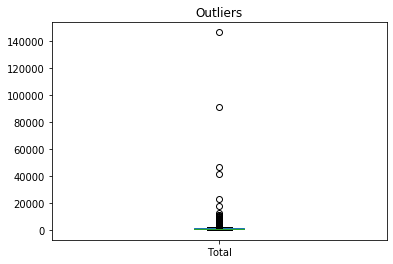

In [30]:
# Ploting outliers
plt.figure(figsize=(8,8))
df.plot.box()
plt.title('Outliers')
plt.show();

In [31]:
#Removing outliers
q1=np.percentile(df.Total, 25)
q3=np.percentile(df.Total, 75)

In [32]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [33]:
len(df[df.Total < lower])

0

In [34]:
df_outliers=df[df.Total < upper]
df_outliers.shape

(31367, 2)

<Figure size 576x576 with 0 Axes>

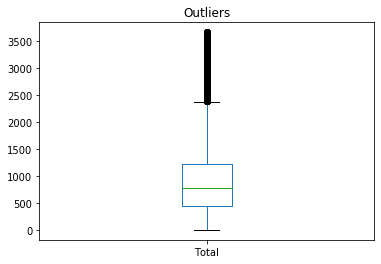

In [35]:
plt.figure(figsize=(8,8))
df_outliers.plot.box()
plt.title('Outliers')
plt.show();

In [36]:
df_18=df_outliers.groupby(['Datetime']).sum()

In [37]:
df_18.head()

,Total
Datetime,
2018-04-26 09:04:15,520
2018-04-26 09:05:57,200
2018-04-26 09:07:21,350
2018-04-26 09:13:39,840
2018-04-26 09:17:07,290


In [39]:
df_18.to_csv('2018_prophet_dt.csv')

# File version without Time

In [48]:
df = pd.read_csv('transactions-2018_utf8.csv', encoding='UTF-8', sep = '\t')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,23,32,33,34,37,38,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
df = df[['Date', 'Total Collected']]

In [50]:
# Cleaning Date
df.Date=pd.to_datetime(df.Date)

In [51]:
# Cleaning Total Collected
df['Total Collected'] = df['Total Collected'].str.replace('¥', '')
df['Total Collected'] = df['Total Collected'].str.replace(',', '')
df['Total Collected'] = df['Total Collected'].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31926 entries, 0 to 31925
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             31926 non-null  datetime64[ns]
 1   Total Collected  31926 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 499.0 KB


In [53]:
df.head()

,Date,Total Collected
0,2018-12-31,400
1,2018-12-31,1160
2,2018-12-31,50
3,2018-12-31,930
4,2018-12-31,250


In [54]:
# To delete returns 
df=df.drop(df[df['Total Collected'] < 0].index)

In [55]:
# Renaming
df.rename(columns={'Total Collected':'Total'}, inplace=True)

<Figure size 576x576 with 0 Axes>

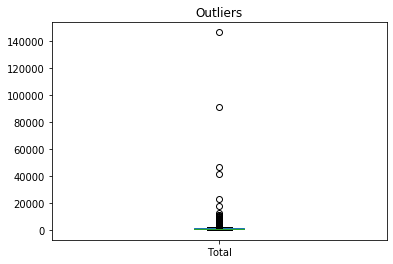

In [56]:
# Ploting outliers
plt.figure(figsize=(8,8))
df.plot.box()
plt.title('Outliers')
plt.show();

In [57]:
#Removing outliers
q1=np.percentile(df.Total, 25)
q3=np.percentile(df.Total, 75)

In [58]:
iqr=q3-q1

upper=q3+3*iqr
lower=q3-3*iqr

In [59]:
len(df[df.Total < lower])

0

In [60]:
df_outliers=df[df.Total < upper]
df_outliers.shape

(31367, 2)

<Figure size 576x576 with 0 Axes>

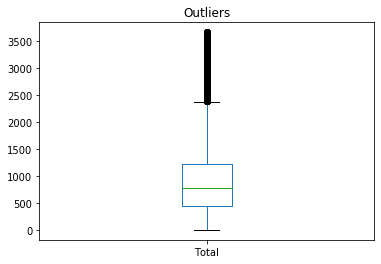

In [61]:
plt.figure(figsize=(8,8))
df_outliers.plot.box()
plt.title('Outliers')
plt.show();

In [62]:
df_18=df_outliers.groupby(['Date']).sum()

In [63]:
df_18.head()

,Total
Date,
2018-04-26,154847
2018-04-27,115404
2018-04-28,214596
2018-04-29,266887
2018-04-30,243023


In [64]:
df_18.to_csv('2018_prophet.csv')